In [69]:
from glob import glob

import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from IPython.display import VimeoVideo
from ipywidgets import Dropdown, FloatSlider, IntSlider, interact
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge  # noqa F401
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.utils.validation import check_is_fitted

In [38]:
def wrangle (filepath):
    #read the filepath
    df = pd.read_csv(filepath)
    
    #drop NaN columns
    df.dropna()
    
    return df

In [40]:
df = wrangle('iris_dataset.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class_name    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [41]:
df.isnull().sum() / len(df)

sepal_length    0.0
sepal_width     0.0
petal_length    0.0
petal_width     0.0
class_name      0.0
dtype: float64

In [45]:
df.select_dtypes('object').head()

,class_name
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


In [46]:
df.select_dtypes('object').nunique()

class_name    3
dtype: int64

<Axes: >

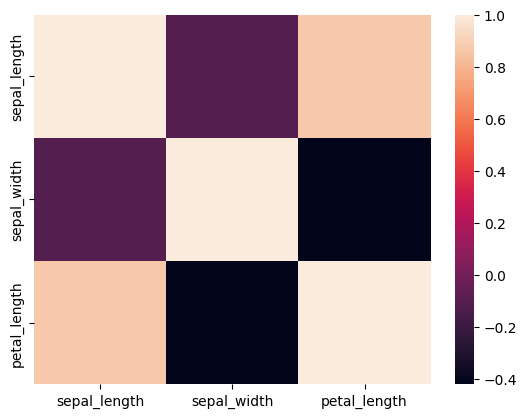

In [53]:
corr = df.select_dtypes('number').drop(columns='petal_width').corr()
sns.heatmap(corr)

In [55]:
target = "petal_width"
feature = ['sepal_length', 'sepal_width', 'petal_length', 'class_name']
X_train = df[feature]
y_train = df[target]

In [56]:
y_mean = y_train.mean()
print("Mean apt price:", round(y_mean, 2))

y_pred_baseline = [y_mean] * len(y_train)
print("Baseline MAE:", mean_absolute_error(y_train, y_pred_baseline))

Mean apt price: 1.2
Baseline MAE: 0.6589333333333334


In [57]:
model = make_pipeline (
    OneHotEncoder (use_cat_names= True),
    SimpleImputer(),
    Ridge()
)

model.fit(X_train, y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['class_name'], use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('ridge', Ridge())])

In [58]:
y_pred_training = model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train, y_pred_training))

Training MAE: 0.12097922599704726


In [62]:
X_test = pd.read_csv('iris_dataset.csv')
X_test = X_test.drop(columns='petal_width')
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test.head()

0    0.239010
1    0.159063
2    0.188835
3    0.240769
4    0.269341
dtype: float64

In [66]:
def make_prediction(sepal_length, sepal_width, petal_length, class_name):
    data = {
        'sepal_length': sepal_length,
        'sepal_width': sepal_width,
        'petal_length': petal_length,
        'class_name': class_name
    }
    df = pd.DataFrame(data, index  = [0])
    prediction = model.predict(df)
    return f"The Petal_width: {prediction}"

In [67]:
make_prediction(5.1, 3.5, 1.5, 'iris-setosa')

'The Petal_width: [0.66673187]'

In [ ]:
interact (
    make_prediction,
    sepal_length = FloatSlider(
        min= X_train["sepal_length"].min(),
        max= X_train["sepal_length"].max(),
        value= X_train["sepal_length"].mean(),
    ),
    lat=FloatSlider(
        min=X_train["sepal_width"].min(),
        max=X_train["sepal_width"].max(),
        step=0.01,
        value=X_train["sepal_width"].mean(),
    ),
    lon=FloatSlider(
        min=X_train["petal_length"].min(),
        max=X_train["petal_length"].max(),
        step=0.01,
        value=X_train["petal_length"].mean(),
    ),
    neighborhood=Dropdown(options=sorted(X_train["class_name"].unique())),
);

ValueError: cannot find widget or abbreviation for argument: 'sepal_length'